In [1]:
rm(list = ls())

ipak <- function(pkg){
  new.pkg <- pkg[!(pkg %in% installed.packages()[, "Package"])]
  if (length(new.pkg))
    install.packages(new.pkg, dependencies = TRUE)
  sapply(pkg, require, character.only = TRUE)
}

packages <- c('tidyverse', 'fpp2', 'readr', 'dplyr', 'xts', 'ggplot2','astsa', 'Hmisc')

ipak(packages)

Loading required package: tidyverse

── Attaching packages ───────────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.3     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   2.0.1     ✔ forcats 0.5.1

── Conflicts ──────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Loading required package: fpp2

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

── Attaching packages ──────────────────────────────────────────────────── fpp2 2.4 ──

✔ forecast  8.15     ✔ expsmooth 2.3 
✔ fma       2.4      

Warning message:
“package ‘fma’ was built under R version 4.1.1”


Loading required package: xts

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric



Attaching package: ‘xts’


The following 

tidyverse      fpp2     readr     dplyr       xts   ggplot2     astsa     Hmisc 
     TRUE      TRUE      TRUE      TRUE      TRUE      TRUE      TRUE      TRUE

In [2]:
library(tidyverse)
library(fpp2)
library(readr)
library(dplyr)
library(astsa)
library(xts)
library(ggplot2)
library(Hmisc)

In [3]:
setwd("~/Dropbox/Working_Directory/Tex_MD/Teaching/tutorial/6003/W3/")

In [4]:
data <- read_csv("cpi.csv")
data <- na.omit(data)

Rows: 432 Columns: 2

── Column specification ──────────────────────────────────────────────────────────────
Delimiter: ","
chr (1): month
dbl (1): cpi


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



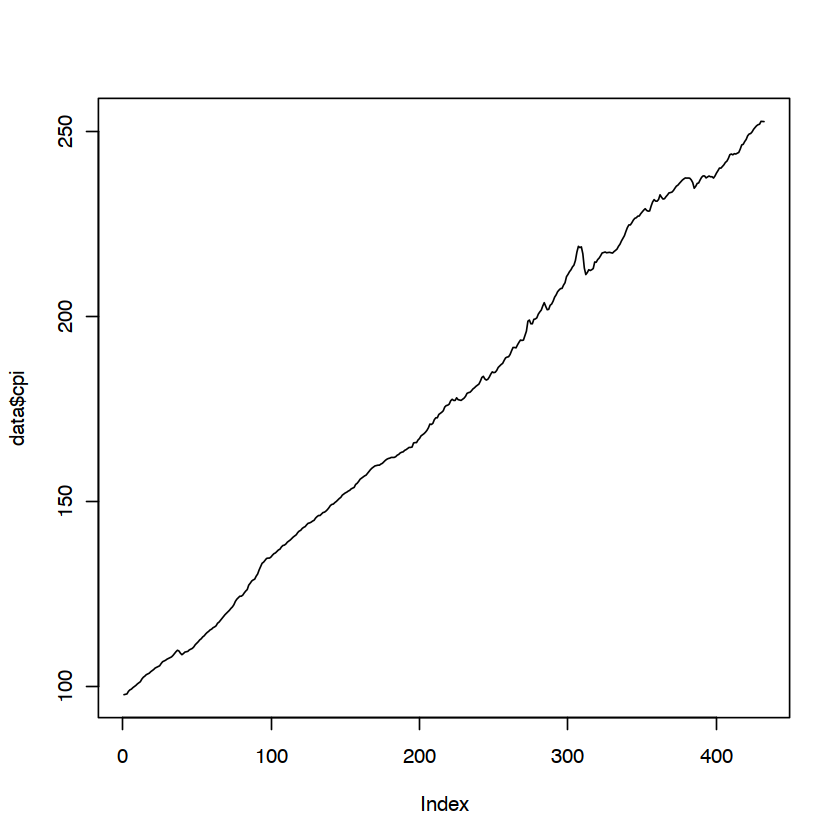

In [5]:
plot(data$cpi, type="l")

In [6]:
cpi_ts = ts(data$cpi, start = 1983,end = 2018, frequency = 12)

cpi_ts

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1983,97.900,98.000,98.100,98.800,99.200,99.400,99.800,100.100,100.400,100.800,101.100,101.400
1984,102.100,102.600,102.900,103.300,103.500,103.700,104.100,104.400,104.700,105.100,105.300,105.500
1985,105.700,106.300,106.800,107.000,107.200,107.500,107.700,107.900,108.100,108.500,109.000,109.500
1986,109.900,109.700,109.100,108.700,109.000,109.400,109.500,109.600,110.000,110.200,110.400,110.800
1987,111.400,111.800,112.200,112.700,113.000,113.500,113.800,114.300,114.700,115.000,115.400,115.600
1988,116.000,116.200,116.500,117.200,117.500,118.000,118.500,119.000,119.500,119.900,120.300,120.700
1989,121.200,121.600,122.200,123.100,123.700,124.100,124.500,124.500,124.800,125.400,125.900,126.300
1990,127.500,128.000,128.600,128.900,129.100,129.900,130.500,131.600,132.500,133.400,133.700,134.200
1991,134.700,134.800,134.800,135.100,135.600,136.000,136.200,136.600,137.000,137.200,137.800,138.200
1992,138.300,138.600,139.100,139.400,139.700,140.100,140.500,140.800,141.100,141.700,142.100,142.300


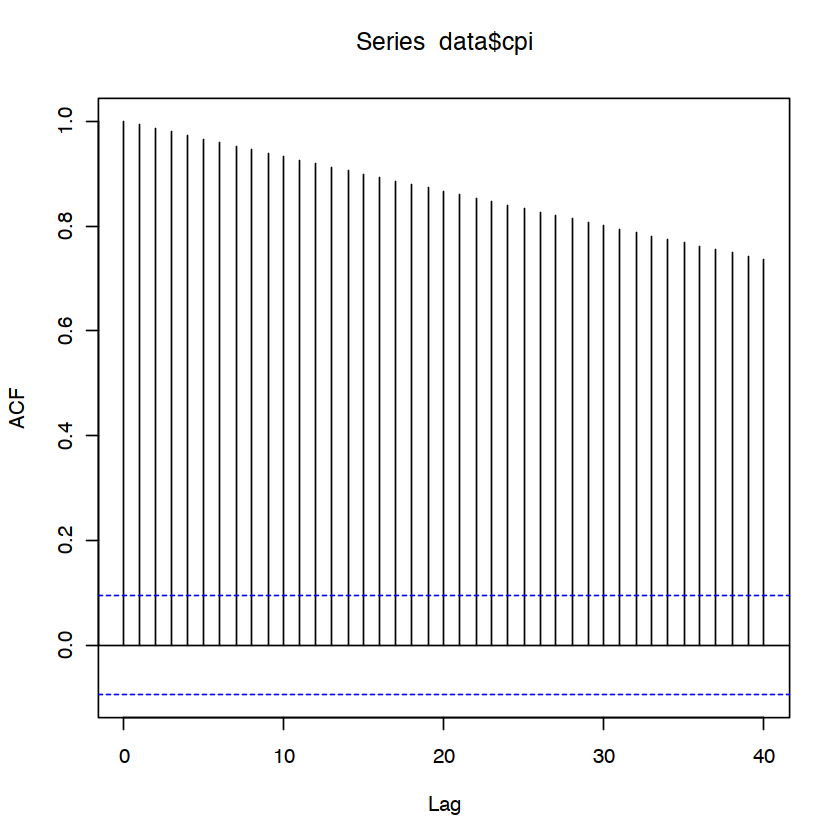

In [7]:
acf(data$cpi, lag.max = 40)

In [9]:
data$infl = (data$cpi - Lag(data$cpi, 12)) / Lag(data$cpi, 12)


infl_ts = ts(data$infl, start = 1983,end = 2018, frequency = 12)

infl_ts

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1983,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1984,4.290092e-02,4.693878e-02,4.892966e-02,4.554656e-02,4.334677e-02,4.325956e-02,4.308617e-02,4.295704e-02,4.282869e-02,4.265873e-02,4.154303e-02,4.043393e-02
1985,3.525955e-02,3.606238e-02,3.790087e-02,3.581801e-02,3.574879e-02,3.664417e-02,3.458213e-02,3.352490e-02,3.247373e-02,3.235014e-02,3.513770e-02,3.791469e-02
1986,3.973510e-02,3.198495e-02,2.153558e-02,1.588785e-02,1.679104e-02,1.767442e-02,1.671309e-02,1.575533e-02,1.757632e-02,1.566820e-02,1.284404e-02,1.187215e-02
1987,1.364877e-02,1.914312e-02,2.841430e-02,3.679853e-02,3.669725e-02,3.747715e-02,3.926941e-02,4.288321e-02,4.272727e-02,4.355717e-02,4.528986e-02,4.332130e-02
1988,4.129264e-02,3.935599e-02,3.832442e-02,3.992902e-02,3.982301e-02,3.964758e-02,4.130053e-02,4.111986e-02,4.184830e-02,4.260870e-02,4.246101e-02,4.411765e-02
1989,4.482759e-02,4.647160e-02,4.892704e-02,5.034130e-02,5.276596e-02,5.169492e-02,5.063291e-02,4.621849e-02,4.435146e-02,4.587156e-02,4.655029e-02,4.639602e-02
1990,5.198020e-02,5.263158e-02,5.237316e-02,4.711617e-02,4.365400e-02,4.673650e-02,4.819277e-02,5.702811e-02,6.169872e-02,6.379585e-02,6.195393e-02,6.254949e-02
1991,5.647059e-02,5.312500e-02,4.821151e-02,4.809930e-02,5.034857e-02,4.695920e-02,4.367816e-02,3.799392e-02,3.396226e-02,2.848576e-02,3.066567e-02,2.980626e-02
1992,2.672606e-02,2.818991e-02,3.189911e-02,3.182828e-02,3.023599e-02,3.014706e-02,3.157122e-02,3.074671e-02,2.992701e-02,3.279883e-02,3.120464e-02,2.966715e-02


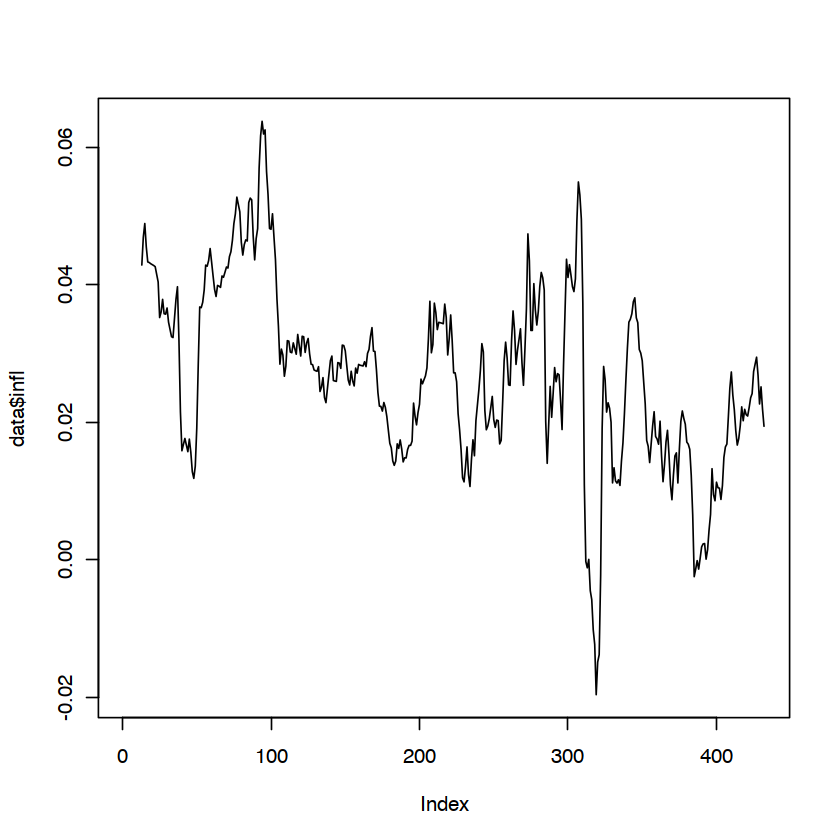

In [10]:
plot(data$infl, type="l")

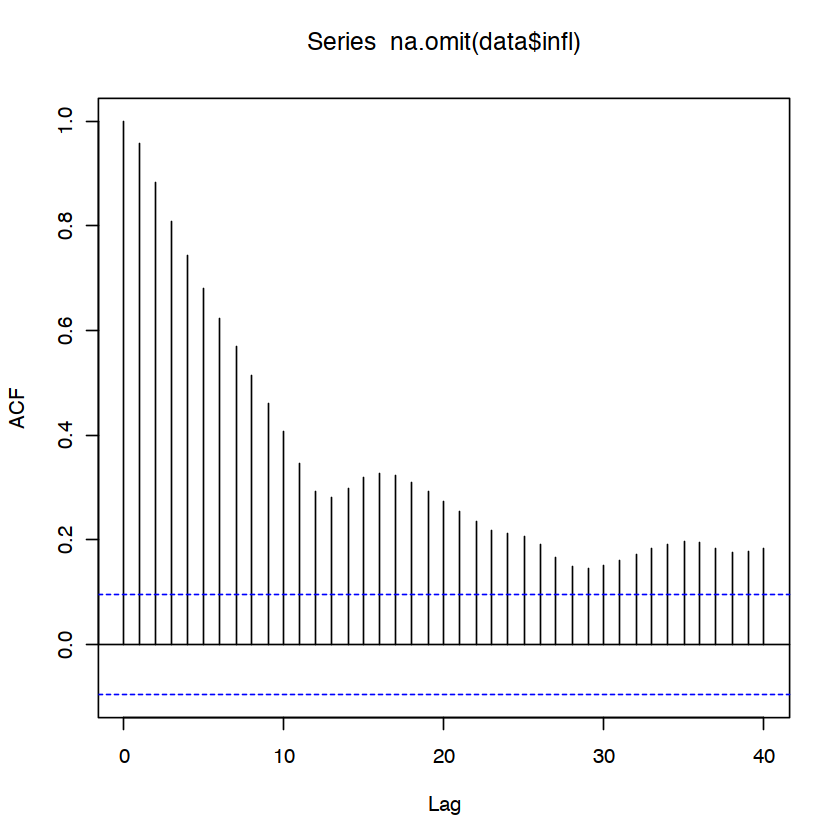

In [12]:
acf(na.omit(data$infl), lag.max = 40)